<center> EE 556 - Intelligent Control </center>

<center>Assignment No. 5 </center>

<center>By: Zeyad Manaa </center>


<center>Aerospace Engineering Graduate Student - King Fahd University of Petroleum and Minerals</center>


<center>Instructor: Prof. Mohammed Abido</center>



In [1]:
from src.optimizers import *
from src.utilis import *
from collections import deque
import pandas as pd

# Question One

It is aimed to minimize the function below

$$f(x_1, x_2, x_3) = x_1^2 + 2x_2^2 + 3x_3^2 + x_1x_2 + x_2x_3 - 8x_1 - 16x_2 - 32x_3 + 110$$

with the variables bounded as such,

$$0 < x_1, x_2, x_3 < 10$$

In [2]:
PROBLEM_NUMBER = 1
VAR_MIN_LIST = [0, 0, 0]
VAR_MAX_LIST = [10, 10, 10]
CHROMOSOME_SIZE = 3
cost_func = cost_fn_1
FILE_NAME = "Problem_1_results"
NUM_OF_ITERATIONS = 10

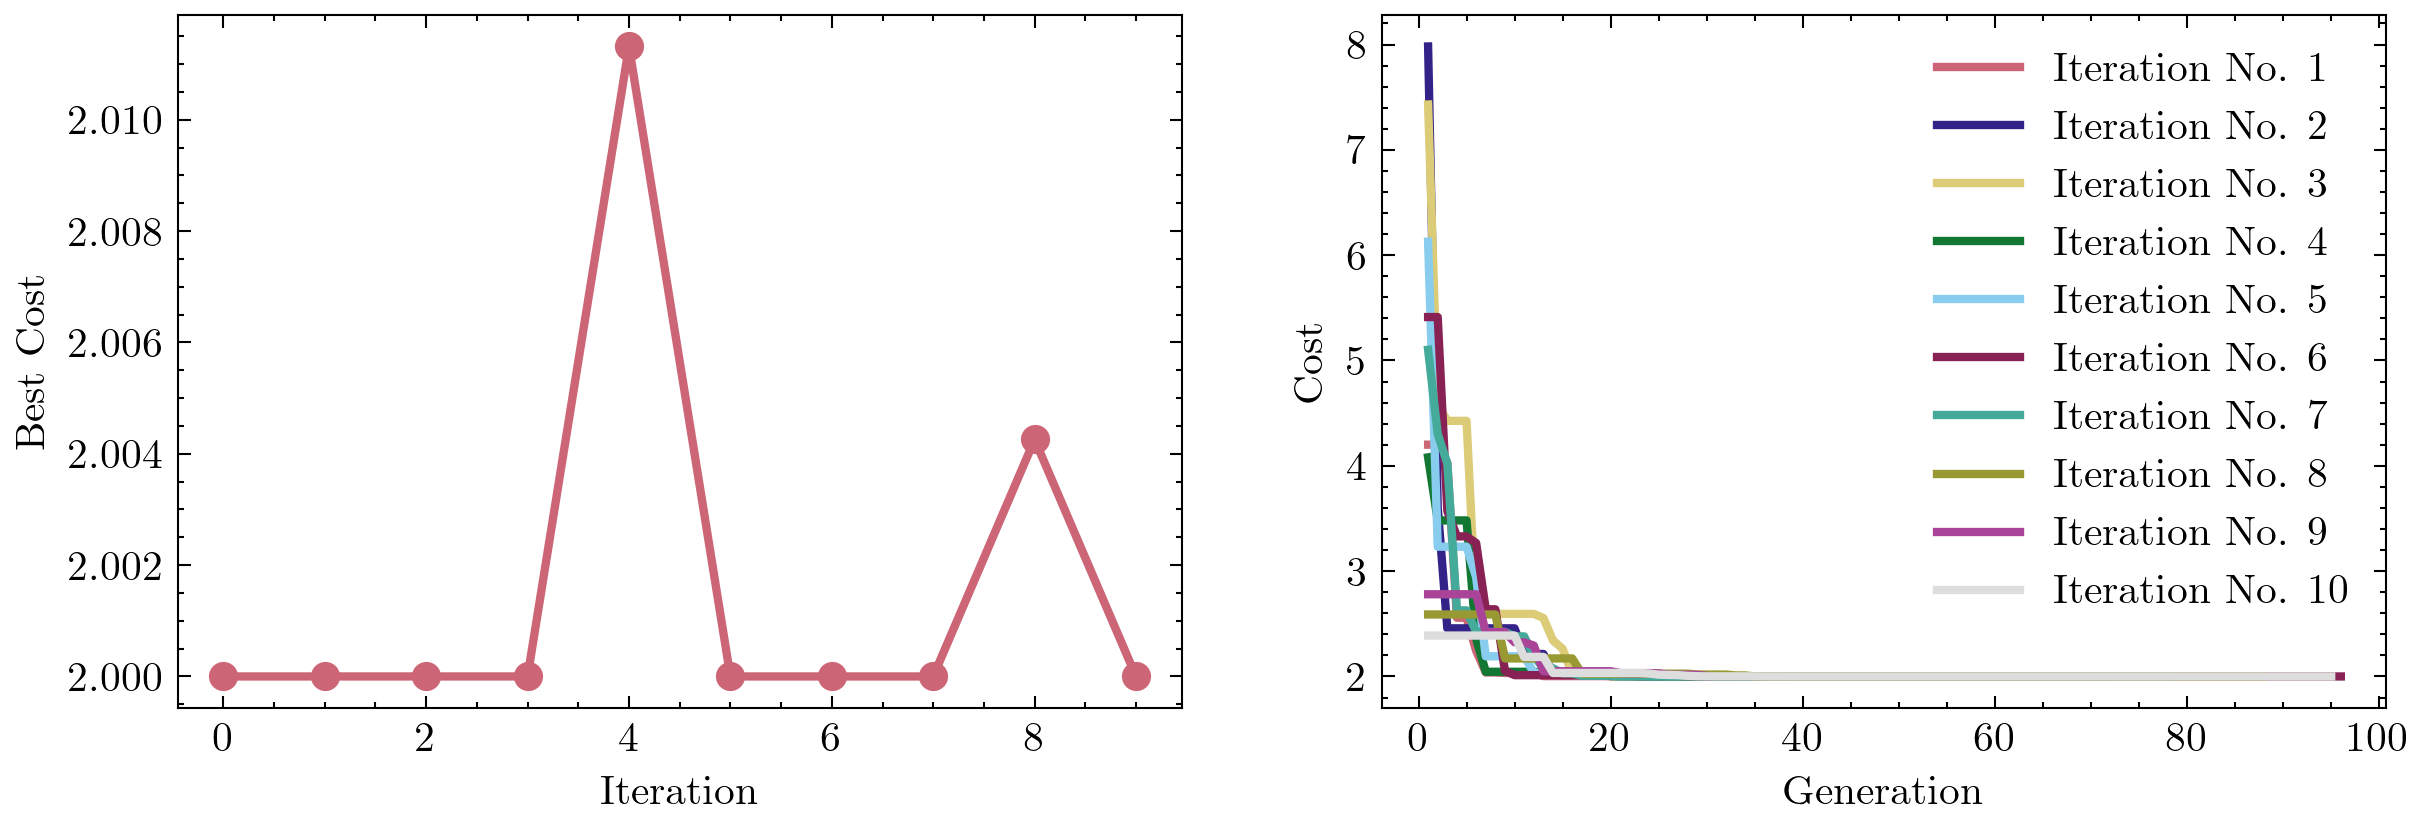

In [3]:
df = pd.DataFrame()

fig, axs = plt.subplots(1, 2)

for generation_number in range(NUM_OF_ITERATIONS):
    settings = {'var_min_list': VAR_MIN_LIST,
                'var_max_list': VAR_MAX_LIST,
                'chromosome_size': CHROMOSOME_SIZE,
                'population_size': np.random.randint(20, 100),
                'mutation_constant': random.uniform(0.4, 0.9),
                'cost_func': cost_func,
                'crossover_constant': random.uniform(0.4, 0.9),
                'number_of_generations': np.random.randint(20, 100)
                }

    optimizer = DifferentialEvolution(settings)
    data, generation_count = optimizer.solve_optimization()
    
    # tabulate data
    temp_df = tabulate_data(data, settings, generation_count)
    df = pd.concat([df, temp_df], ignore_index=True)

    # plot
    plot_results(data, generation_count, generation_number, FILE_NAME)

axs[0].plot(np.arange(0,NUM_OF_ITERATIONS,1), df['Best Cost'])
axs[0].scatter(np.arange(0,10,1), df['Best Cost'])
axs[0].set(xlabel='Iteration', ylabel='Best Cost')

dir_path = '/Users/zeyadmanaa/Documents/Masters/Courses/EE 556/Assignment/5/Figures'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
plt.savefig(os.path.join(dir_path, FILE_NAME + '.png'))


## Data tabulation and analysis

The following cell tabulate the parameters used in each iteration, as well as, the best cost and the best solution corresponding to it. The highlighted row in green shows the overall minimum value of the cost, its corresponding solution and its paramaters. 

In [4]:
# Get minimum cost row
min_cost = df['Best Cost'].min()  
highlight_row = df[df['Best Cost'] == min_cost]

# Apply styling to highlight row
styled = df.style.apply(lambda x: ['background: green' if x.name in highlight_row.index 
                                    else '' for i in x], axis=1)

# Print styled dataframe 
styled

,Best Cost,Best Solution,Population Size,Maximum No. of Generations,No. of Generations,Mutation Constant,Crossover Constant
0,2.000000,[3.00004369 2.00004074 5.00000149],61,62,62,0.426923,0.865464
1,2.000000,[2.99999418 2.00001138 5.00000439],46,73,73,0.484278,0.870402
2,2.000000,[2.99994439 2.00005283 4.99999633],34,89,89,0.692039,0.833014
3,2.000000,[3.00006539 1.99981994 5.00015666],85,71,71,0.734282,0.650374
4,2.011318,[3.11174418 1.95669237 5.00218833],83,20,20,0.663642,0.813479
5,2.000000,[3.00000059 2.0000004 5.00000456],81,97,97,0.412551,0.440601
6,2.000000,[3.00000677 1.99999794 5.00000282],34,79,79,0.512599,0.879013
7,2.000000,[2.99998996 2.00008181 4.99993422],89,89,89,0.708279,0.437904
8,2.004257,[2.93853277 2.00700963 4.98234556],91,31,31,0.887570,0.826539
9,2.000000,[2.99999684 2.00000922 4.999997 ],69,96,96,0.651829,0.703312


# Question Two

In [5]:
PROBLEM_NUMBER == 2 # Question No. 2
VAR_MIN_LIST = [1, 0.1, 0.1]
VAR_MAX_LIST = [100, 1, 0.1]
CHROMOSOME_SIZE = 3
cost_func = cost_fn_2
FILE_NAME = "Problem_2_results"
NUM_OF_ITERATIONS = 10

## Point a.

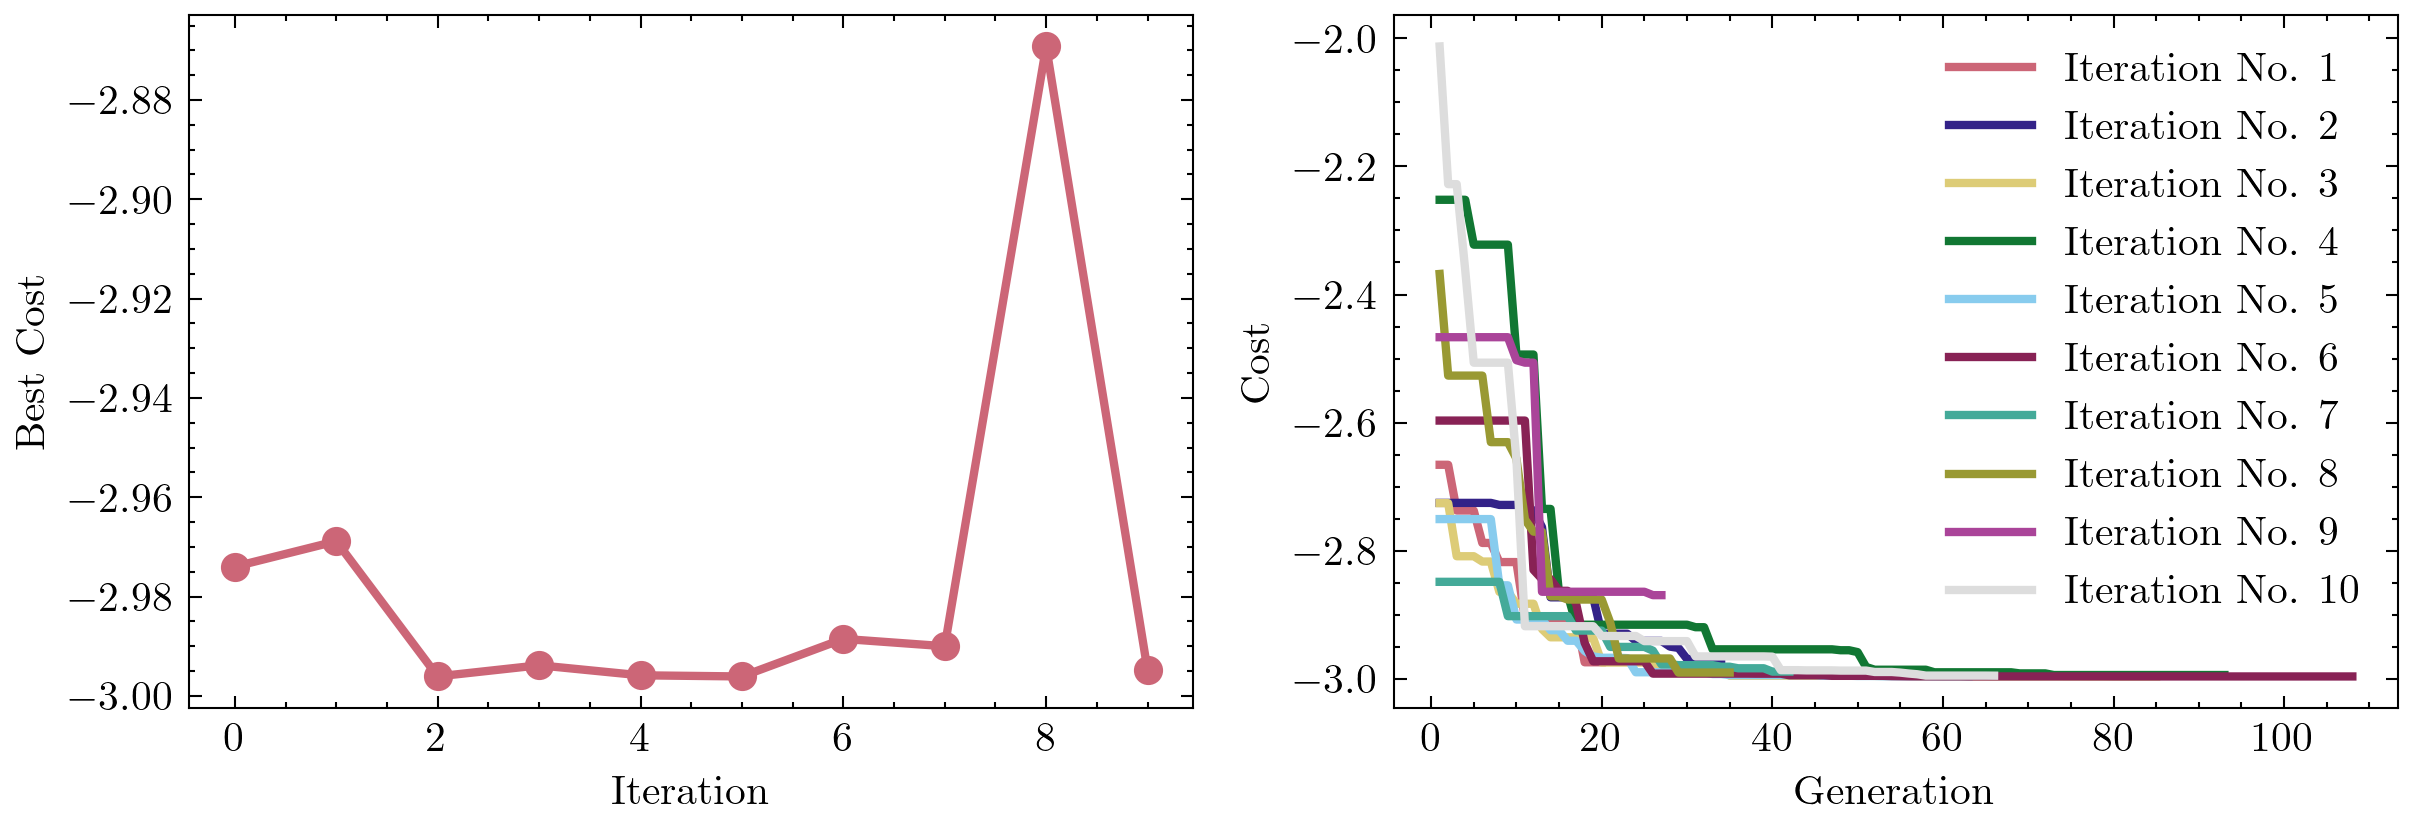

In [6]:
df = pd.DataFrame()
fig, axs = plt.subplots(1, 2)

for generation_number in range(NUM_OF_ITERATIONS):
    settings = {'var_min_list': VAR_MIN_LIST,
                'var_max_list': VAR_MAX_LIST,
                'chromosome_size': CHROMOSOME_SIZE,
                'population_size': np.random.randint(20, 100),
                'mutation_constant': random.uniform(0.4, 0.9),
                'cost_func': cost_func,
                'crossover_constant': random.uniform(0.4, 0.9),
                'number_of_generations': np.random.randint(20, 200)
                }

    optimizer = DifferentialEvolution(settings)
    data, generation_count = optimizer.solve_optimization()
    
    # tabulate data
    temp_df = tabulate_data(data, settings, generation_count)
    df = pd.concat([df, temp_df], ignore_index=True)

    # plot
    plot_results(data, generation_count, generation_number, FILE_NAME)

axs[0].plot(np.arange(0,NUM_OF_ITERATIONS,1), df['Best Cost'])
axs[0].scatter(np.arange(0,10,1), df['Best Cost'])
axs[0].set(xlabel='Iteration', ylabel='Best Cost')

dir_path = '/Users/zeyadmanaa/Documents/Masters/Courses/EE 556/Assignment/5/Figures'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
plt.savefig(os.path.join(dir_path, FILE_NAME + '.png'))


## Point b.

The following cell tabulate the parameters used in each iteration, as well as, the best cost and the best solution corresponding to it. The highlighted row in green shows the overall minimum value of the cost, its corresponding solution and its paramaters. 

In [7]:
# Get minimum cost row
min_cost = df['Best Cost'].min()  
highlight_row = df[df['Best Cost'] == min_cost]

# Apply styling to highlight row
styled = df.style.apply(lambda x: ['background: green' if x.name in highlight_row.index 
                                    else '' for i in x], axis=1)

# Print styled dataframe 
styled

,Best Cost,Best Solution,Population Size,Maximum No. of Generations,No. of Generations,Mutation Constant,Crossover Constant
0,-2.973977,[18.96197624 0.26128762 0.1 ],82,21,21,0.754726,0.709851
1,-2.968863,[19.00790211 0.26111152 0.1 ],38,35,35,0.842755,0.618993
2,-2.996088,[18.40359049 0.2617796 0.1 ],99,86,86,0.661759,0.819446
3,-2.993853,[18.45162817 0.26173514 0.1 ],21,166,94,0.694934,0.416077
4,-2.995871,[18.40585107 0.26177705 0.1 ],97,64,64,0.442275,0.648583
5,-2.996100,[18.40334916 0.26177984 0.1 ],32,109,109,0.684374,0.843663
6,-2.988536,[18.5705556 0.26163433 0.1 ],92,43,43,0.515293,0.444276
7,-2.990015,[18.54292011 0.26165305 0.1 ],55,36,36,0.788945,0.527349
8,-2.869216,[21.3499155 0.25917836 0.1 ],52,28,28,0.895913,0.416413
9,-2.994850,[18.42957247 0.26175519 0.1 ],41,67,67,0.767212,0.592958


### Statistical analysis

One can see how the algorithm is robust against the randomization of its own paprameters. We can see this from the difference between the minimum and maximum cost over the iterations below. Moreover, the average cost over the iterations is almost the same as the best cost. That being said highlights the algorithm's robustness against various randomization. The upcoming cell shows the statistics of data in terms of, mean value, standard deviation, minimum value, first, second, and third quartiles, and finally, the maximum value.

In [8]:
stats_df = df.describe()
stats_df

,Best Cost,Population Size,Maximum No. of Generations,No. of Generations,Mutation Constant,Crossover Constant
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-2.976737,60.900000,65.500000,58.300000,0.704819,0.603761
std,0.038991,29.114525,44.858419,30.375612,0.139930,0.156093
min,-2.996100,21.000000,21.000000,21.000000,0.442275,0.416077
25%,-2.995616,38.750000,35.250000,35.250000,0.667413,0.465044
50%,-2.991934,53.500000,53.500000,53.500000,0.724830,0.605976
75%,-2.977616,89.500000,81.250000,81.250000,0.783512,0.694534
max,-2.869216,99.000000,166.000000,109.000000,0.895913,0.843663


## Point c

In [9]:
idx = df['Best Cost'].argsort()[0]
best_values = df.loc[idx]
gains = best_values['Best Solution']

gains = best_values['Best Solution'].tolist() 
K, T1, T2 = gains

Get the eigenvalues of the closed loop dynamics, with the optimal gains

In [10]:
# Get the closed loop matrix
A_OL = np.array([[0, 377, 0, 0],
                  [-0.0587, 0, -0.1303, 0],
                  [-0.0899, 0, -0.1956, 0.1289],
                  [95.605, 0, -816.0862, -20]])
    
B_OL = np.array([[0, 0, 0, 0],
              [0, 0, 0, 1000]]).T

K_CL = np.array([[-0.0587, 0, -0.1303, 0],
                [-0.0587*K*T1/T2, 0, -0.1303*K*T1/T2, 0]])

B_CL = np.array([[-0.333, 0],
                [K/T2*(1-T1/3), -1/T2]])

A_CL = np.block([[A_OL, B_OL], [K_CL, B_CL]])

# Get the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A_CL)
eigenvalues_df = pd.DataFrame(eigenvalues, columns=["eigenvalues"])
eigenvalues_df

,eigenvalues
0,-18.19876+0.00000j
1,-2.996100+5.521835j
2,-2.996100-5.521835j
3,-2.996101+5.510763j
4,-2.996101-5.510763j
5,-0.345438+0.000000j


## Monte-carlo simulation for question two

In this section, I have run the algorithm for 1000 times just for another way to test its robustness. A hsitogram of the best cost value over the iterations has been plotted to see the algorithm's robustness. The histogram is right skewed having its mean value towards the optimal cost value indicative of the algorithm efficiency against the radomization of the initialization and the rest of its parameters namely, population size, mutation constant, crossover constant, and number of generations. 

In [11]:
PROBLEM_NUMBER == 2 # Question No. 2
VAR_MIN_LIST = [1, 0.1, 0.1]
VAR_MAX_LIST = [100, 1, 0.1]
CHROMOSOME_SIZE = 3
cost_func = cost_fn_2
FILE_NAME = "Problem_2_Mote_Carlo"
NUM_OF_ITERATIONS = 1000

In [12]:
df = pd.DataFrame()

for generation_number in range(NUM_OF_ITERATIONS):
    settings = {'var_min_list': VAR_MIN_LIST,
                'var_max_list': VAR_MAX_LIST,
                'chromosome_size': CHROMOSOME_SIZE,
                'population_size': np.random.randint(20, 100),
                'mutation_constant': random.uniform(0.4, 0.9),
                'cost_func': cost_func,
                'crossover_constant': random.uniform(0.4, 0.9),
                'number_of_generations': np.random.randint(20, 200)
                }

    optimizer = DifferentialEvolution(settings)
    data, generation_count = optimizer.solve_optimization()
    
    # tabulate data
    temp_df = tabulate_data(data, settings, generation_count)
    df = pd.concat([df, temp_df], ignore_index=True)

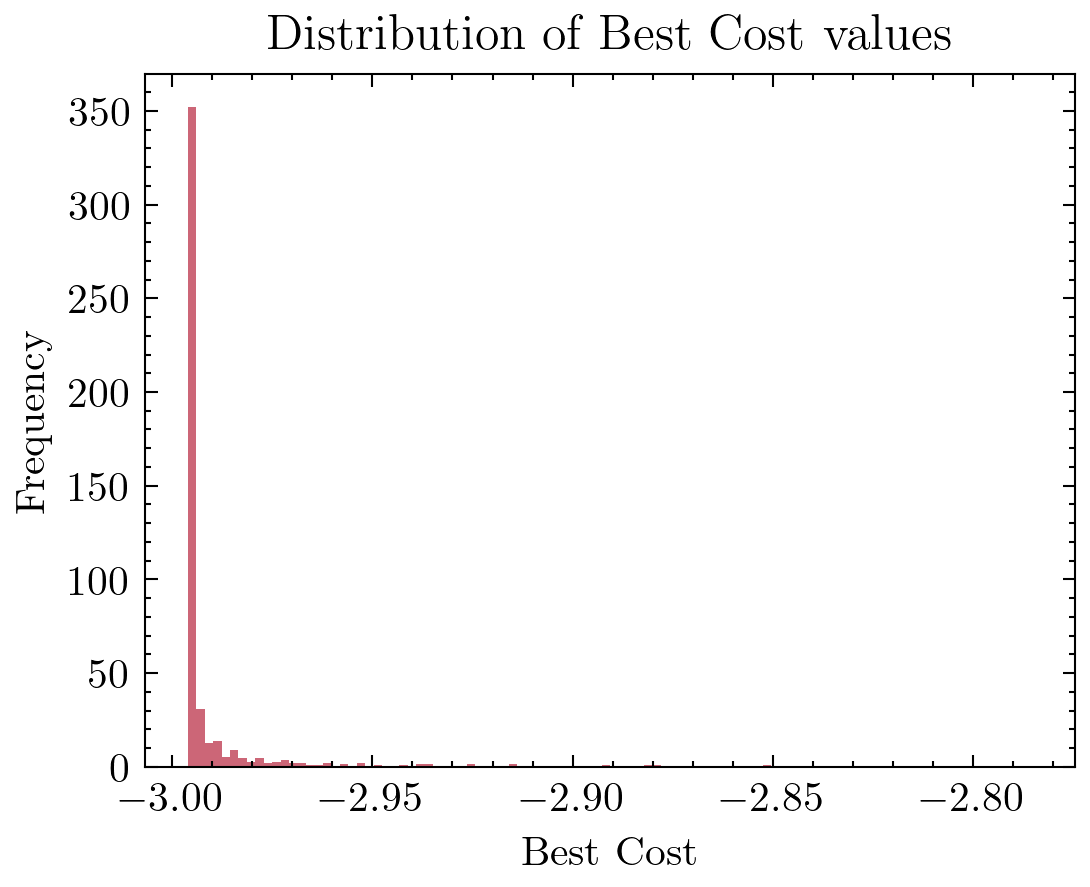

In [21]:
# Extract the "Best Cost" column
best_costs = df["Best Cost"] 

fig, axs = plt.subplots(figsize = (4, 3))

# Draw a histogram
plt.hist(best_costs, bins=100, density=True)

# Customize and save plot
plt.title("Distribution of Best Cost values")  
plt.xlabel("Best Cost")
plt.ylabel("Frequency")
dir_path = '/Users/zeyadmanaa/Documents/Masters/Courses/EE 556/Assignment/5/Figures'
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
plt.savefig(os.path.join(dir_path, FILE_NAME + '.png'))